### Multi-view CIFAR10, MNIST, Noisy MNIST
#### 2019/09/19

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm
import seaborn as sns; sns.set()
import pandas as pd
import scipy as sp
sns.set_style(style='whitegrid')

%matplotlib inline

In [53]:
nmist = [1.000,   6.11932209e-01,   6.03579460e-01,   5.19250493e-01,
   4.35731692e-01,   4.11550829e-01,   2.86922589e-01,   2.32048484e-01,
   1.44035460e-01,   1.27401305e-01,   1.25637197e-02,  -8.03264555e-04,
  -5.15573472e-03,  -9.96150766e-03,   1.83516635e-03,  -1.10933740e-03,
  -5.22831519e-03,   7.31128176e-03,  -8.96698694e-03,   1.42446124e-02,
  -9.26122286e-04,   1.22443912e-02,   2.57283886e-03,  -2.87086393e-03,
  -2.06959928e-02,  -2.66209585e-04,   5.50623642e-03,   5.64510526e-03,
  -2.03016958e-02,   1.31249233e-02,   1.21247206e-02,  -1.48156937e-02,
   5.98126084e-03,  -4.93252605e-03,   1.32899587e-02,   2.10414837e-02,
  -3.39143145e-03,   5.73067660e-03,   1.64964365e-02,   7.49847614e-03,
   7.55787657e-03,   1.36689422e-03,  -4.12760109e-03,   2.18908412e-05,
  -1.26557639e-02,   6.36747217e-03,  -3.39121552e-03,   2.14954575e-03,
   3.01627534e-03,   8.76506639e-03,  -1.27357790e-02,  -1.82384436e-02,
  -1.17820477e-02,   5.35380942e-03,   5.31332773e-03,  -1.58133911e-03,
   4.16241975e-03,   1.93216652e-03,  -1.18172623e-02,  -1.31677362e-02,
  -6.46284331e-03,   1.32743706e-02,  -1.40957374e-02,   7.75707449e-03,
  -8.82906181e-03,  -1.81296635e-02,  -7.09748595e-03,  -1.03938702e-03,
   1.09689044e-02,  -4.27191195e-03,  -2.80871400e-03,   1.52705824e-03,
  -1.17356964e-02,   1.37688364e-02,  -1.15591904e-03,  -2.72099249e-03,
  -2.80909923e-03,  -1.11089664e-03,  -3.91676228e-03,   1.16692960e-02,
  -7.49392217e-03,  -1.89307165e-03,   4.54228895e-04,   6.94564342e-03,
  -2.57235587e-03,   1.64783543e-02,  -9.92600929e-03,  -4.71423603e-03,
  -3.94791091e-04,   8.79985383e-03,  -8.38658562e-03,   2.83395383e-03,
   7.49006025e-03,  -1.30554124e-03,  -5.06787776e-04,  -1.82229199e-02,
   6.77726646e-03,  -7.31948525e-03,  -1.90217187e-03,   1.10127200e-02,
  -3.30377399e-04,  -7.15516285e-03,  -2.01162808e-02,  -8.10793966e-03,
  -9.37599417e-03,   9.22706635e-03,   2.44810487e-02,  -5.26531570e-03,
  -1.06351708e-02,   4.24380516e-03,   1.36312742e-03,  -1.09140051e-02,
   1.35274874e-02,  -1.52411904e-02,  -1.05395005e-03,   1.69949608e-02,
   1.28508431e-02,   1.90480940e-02,   1.94942852e-03,   6.71761825e-04,
  -7.19967617e-03,   1.74468124e-02,  -1.22426866e-02,  -1.37286596e-02,
  -5.71089364e-03,  -7.12494400e-03,   1.03955911e-02,   1.40351443e-03,
  -6.76640592e-03,  -5.21128498e-03,  -4.79416904e-03,   1.58430817e-02,
   4.07004216e-03,  -7.56900470e-03,   6.29686811e-03,   4.32682344e-04,
  -3.98588492e-03,  -1.59884149e-02,   2.81278893e-02,  -9.43546825e-03,
  -6.51459495e-03,   8.95598444e-03,  -1.39723408e-02,  -3.43368247e-03,
  -3.72013104e-03,  -9.03539313e-03,  -4.32519553e-04,   5.83012534e-03,
  -2.35900348e-02,   1.83269992e-03,  -2.96924633e-03,  -7.99666230e-04,
  -7.28667223e-03,   8.58237067e-03,  -3.28502065e-04,   1.20014266e-04,
   1.16786219e-02,   9.62530246e-03,  -2.07686143e-03,   1.14437971e-02,
  -4.95974283e-03,  -1.03823216e-02,   2.19785931e-03,   1.60087536e-04,
  -1.15912028e-02,  -1.64260722e-03,   2.88715409e-03,   1.99132203e-02,
   7.59378855e-04,   8.37647050e-03,   8.25495932e-03,  -3.01725747e-03,
   4.15247543e-03,  -2.08612990e-02,   1.92241640e-02,  -1.00515221e-03,
  -1.19696277e-02,   1.74862421e-02,  -1.22566037e-02,  -3.73108676e-03,
  -2.87110438e-03,   1.52495508e-02,  -8.18292525e-03,   1.56236586e-02,
  -1.18950878e-02,  -7.21751750e-03,  -3.90972149e-03,  -1.32150563e-02,
  -5.96575811e-03,  -4.36706248e-03,  -3.07367225e-03,  -1.09956460e-02,
   4.25908510e-03,   2.27461076e-03,   1.98242851e-02,   2.48094997e-03,
   1.13342946e-04,   1.46632509e-02,   1.21719285e-02,  -9.23030292e-16]

In [24]:
mnist = [1.000, 0.989, 0.987, 0.987, 0.985, 0.982, 0.981, 0.979, 0.978, 0.976, 
         0.00098, 0.0007, 0.00076, 0.00054, 0.00022, 0.0, 0.00062, 0.00025, 0.00097, 
         0.00095, 7e-05, 0.00017, 0.00092, 0.00072, 0.00066, 0.00071, 0.00063, 0.00018, 0.00049, 
         0.00059, 0.012, 0.047, 0.039, 0.063, 0.055, 0.066, 0.045, 0.012, 0.057, 0.071, 0.046, 0.03, 
         0.073, 0.079, 0.066, 0.077, 0.003, 0.0002, 0.0014, 0.0047, 0.0033, 0.0047, 0.0087, 0.0006, 
         0.005, 0.0007, 0.0026, 0.0025, 0.0073, 0.0023, 0.0015, 0.006, 0.0057, 0.0034, 0.0049, 0.0074, 
         0.0027, 0.0086, 0.0065, 0.0081, 0.0061]

In [51]:
cifar10 = [1.00000000e+00,   8.27155990e-01,   9.39236132e-01,   8.62649428e-01,
   8.61344052e-01,   5.69815324e-01,   6.09547322e-01,   2.68349579e-01,
   5.49697935e-01,   5.42044978e-01,   9.22360708e-01,   2.51681333e-01,
   2.29695141e-01,  -2.27247534e-02,   2.53806346e-02,   8.37569340e-03,
   4.65321859e-03,  -4.16464194e-03,   1.35124287e-02,  -2.41043338e-02,
   7.98681805e-03,  -3.48953739e-03,   3.92943842e-03,  -3.39563721e-03,
  -9.29362340e-05,   2.91031471e-03,   6.94493871e-03,   7.35948585e-03,
  -5.56073846e-03,   4.63044322e-03,  -1.16001189e-02,   1.33912492e-02,
   2.98819350e-03,  -2.13895481e-04,  -9.44496889e-03,  -1.14052572e-02,
   2.54470486e-02,   5.98522140e-04,  -1.50400583e-02,   3.96019761e-03,
  -1.42747176e-02,   1.99247618e-02,  -6.36685063e-04,  -1.75879677e-02,
  -4.89317260e-04,   1.41246878e-03,  -7.95442392e-04,  -3.52959835e-03,
   1.19740339e-02,   1.80574510e-02,  -5.00173155e-04,  1.22940463e-02,
  -2.78008343e-03,   1.06226218e-02,   3.72137187e-03,   2.31657416e-03,
   4.37493628e-03,  -3.72985614e-03,   1.86925670e-02,  -4.01831127e-03,
  -2.09991174e-02, -9.80283488e-03,  -7.36832260e-03,  -2.70857118e-03,
   5.39657852e-03,   2.91655182e-03,   5.02552897e-03,   1.23793423e-02,
   2.99748506e-02,   1.87864269e-02,  -4.06842650e-03,  -5.57619016e-03,
   3.11299988e-03,  -2.33024717e-02,  -2.86322252e-03,  -1.28004381e-04,
  -9.02489835e-03,   9.74442535e-04,   5.70574942e-03,   4.44864151e-03,
  -8.00634332e-03,   1.08051644e-02,  -2.14222798e-02,  -4.29547105e-03,
   6.54102130e-03,  -1.04299730e-02,   7.70828130e-03,   1.09445879e-02,
   7.04323058e-03,  -5.86878328e-03,   1.32632359e-02,   8.01693038e-03,
   5.82940160e-03,  -5.92770084e-03,   4.31019323e-03,  -1.61598938e-03,
   1.51172299e-02,  -4.73956961e-03,   4.21897829e-04,   4.87012430e-03]

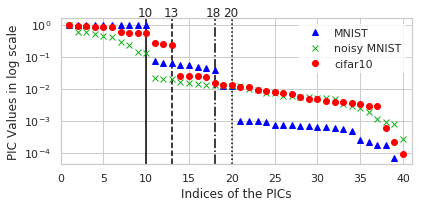

In [89]:
fs = 12
fig = plt.figure(figsize=(6, 3))

plt.axvline(10, color='black', linestyle='-')
plt.text(9, 1.8, '10', fontsize=fs)

plt.axvline(13, color='black', linestyle='--')
plt.text(12, 1.8, '13', fontsize=fs)

plt.axvline(18, color='black', linestyle='-.')
plt.text(17, 1.8, '18', fontsize=fs)

plt.axvline(20, color='black', linestyle=':')
plt.text(19, 1.8, '20', fontsize=fs)

plt.semilogy(range(1, 41), np.flip(np.sort(np.abs(mnist[0:40])), 0), 
             color='blue', marker='^', linestyle='', label='MNIST')
plt.semilogy(range(1, 41), np.flip(np.sort(np.abs(nmist[0:40])), 0), 
             color=sns.xkcd_rgb['green'], marker='x', linestyle='', label='noisy MNIST')
plt.semilogy(range(1, 41), np.flip(np.sort(np.abs(cifar10[0:40])), 0),
             color='red', marker='o', linestyle='', label='cifar10')

plt.xlabel('Indices of the PICs', fontsize=fs)
plt.ylabel('PIC Values in log scale', fontsize=fs)
plt.tight_layout()



plt.legend(loc='upper right', edgecolor='None')
plt.xlim(0, 41);
fig.savefig('multiview.png', format='png', dpi=300)

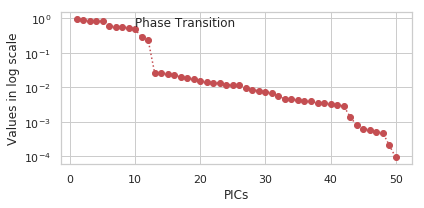

In [11]:
fs = 12
fig = plt.figure(figsize=(6, 3))
plt.semilogy(range(1, 51), np.flip(np.sort(np.abs(cifar10[1:51])), 0), 'ro:')
plt.xlabel('PICs', fontsize=fs)
plt.ylabel('Values in log scale', fontsize=fs)
plt.text(9+1, cifar10[9]+0.05, 'Phase Transition', fontsize=fs)
plt.tight_layout()
fig.savefig('nMNIST.eps', format='eps', dpi=1000)

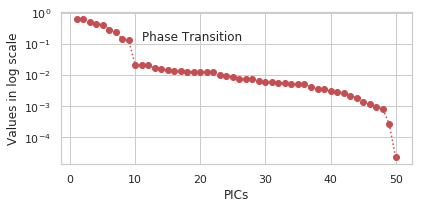

In [10]:
fs = 12
fig = plt.figure(figsize=(6, 3))
plt.semilogy(range(1, 51), np.flip(np.sort(np.abs(nmist[1:51])), 0), 'ro:')
plt.xlabel('PICs', fontsize=fs)
plt.ylabel('Values in log scale', fontsize=fs)
plt.text(9+2, nmist[9], 'Phase Transition', fontsize=fs)
plt.tight_layout()
fig.savefig('cifar10.eps', format='eps', dpi=1000)

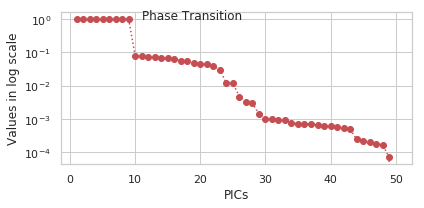

In [27]:
fs = 12
fig = plt.figure(figsize=(6, 3))
plt.semilogy(range(1, 51), np.flip(np.sort(np.abs(mnist[1:51])), 0), 'ro:')
plt.xlabel('PICs', fontsize=fs)
plt.ylabel('Values in log scale', fontsize=fs)
plt.text(9+2, mnist[9], 'Phase Transition', fontsize=fs)
plt.tight_layout()
fig.savefig('cifar10.eps', format='eps', dpi=1000)

## PICs

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
trueCorr_train = wF_train.transpose().dot(wG_train)/wG_train.shape[0]
sns.heatmap(trueCorr_train, vmin=0., vmax = 1., ax=ax[0])
ax[0].set_title('Training E[F(X)G(Y)]')
trueCorr_test = wF_test.transpose().dot(wG_test)/wG_test.shape[0]
sns.heatmap(trueCorr_test, vmin=0., vmax = 1., ax=ax[1])
ax[1].set_title('Test E[F(X)G(Y)]')

print('Training set PICs: {}'.format(np.diagonal(trueCorr_train)))
print('Test set PICs: {}'.format(np.diagonal(trueCorr_test)))

In [ ]:
fs = 12
fig = plt.figure(figsize=(6, 3))
plt.semilogy(range(1, 51), np.abs(np.diagonal(trueCorr_test[0:50])), 'ro:')
plt.xlabel('PICs', fontsize=fs)
plt.ylabel('Values in log scale', fontsize=fs)
plt.text(9+1, trueCorr_test[9, 9]+0.05, 'Phase Transition', fontsize=fs)
plt.tight_layout()
fig.savefig('cifar10.eps', format='eps', dpi=1000)

In [ ]:
cifar10 = [1.00000000e+00, 9.39846517e-01, 9.09527732e-01, 8.76924922e-01, 8.40669254e-01,
           6.34760460e-01, 5.75754447e-01, 5.56789948e-01, 4.80186085e-01, 4.70375851e-01,
           3.38046804e-01, 2.96562696e-01, 1.93305453e-01, 1.12570520e-01, 9.92294810e-02,
           8.22699992e-02, 7.81092697e-02, 7.70331111e-02, 7.47400855e-02, 7.31689547e-02,
           7.09136891e-02, 6.99753753e-02, 6.84804902e-02, 6.70930430e-02, 6.58961689e-02,
           6.49680514e-02, 6.33402000e-02, 6.27665050e-02, 6.18276941e-02, 6.12440744e-02,
           5.89223165e-02, 5.71490653e-02, 5.52344679e-02, 5.46560633e-02, 5.30938724e-02,
           5.28902181e-02, 5.22371376e-02, 5.15357873e-02, 5.03128460e-02, 4.97622611e-02,
           4.91833351e-02, 4.76837317e-02, 4.65807506e-02, 4.55665585e-02, 4.45398687e-02,
           4.43072284e-02, 4.27428133e-02, 4.18923820e-02, 4.12095086e-02, 4.04002582e-02]

In [ ]:
nmist = [1.00000000e+00, 6.11593318e-01, 5.79040046e-01, 5.37081095e-01, 4.40710581e-01,
         4.11038724e-01, 3.07230620e-01, 2.60500292e-01, 1.87942812e-01, 1.57957079e-01, 
         1.22278708e-01, 1.20451570e-01, 1.17853314e-01, 1.15569322e-01, 1.14670296e-01, 
         1.13745281e-01, 1.11751620e-01, 1.10585051e-01, 1.09386012e-01, 1.08234094e-01, 
         1.08045308e-01, 1.06324684e-01, 1.06126008e-01, 1.05523483e-01, 1.04388666e-01, 
         1.01914463e-01, 1.01734690e-01, 1.00730231e-01, 9.97470784e-02, 9.92176594e-02,
         9.87336284e-02, 9.83482730e-02, 9.73134584e-02, 9.56189883e-02, 9.49312636e-02,
         9.43121782e-02, 9.31623032e-02, 9.30078500e-02, 9.20260807e-02, 9.15377555e-02, 
         8.99709653e-02, 8.91696976e-02, 8.83532514e-02, 8.78753309e-02, 8.67918156e-02,
         8.65513319e-02, 8.63195646e-02, 8.50077132e-02, 8.45173085e-02, 8.35031172e-02, 
         8.26551042e-02, 8.25578315e-02, 8.13186462e-02, 8.08157610e-02, 7.99290029e-02   7.95686823e-02
   7.90213542e-02   7.84196176e-02   7.75910545e-02   7.70453791e-02
   7.61937262e-02   7.56572054e-02   7.49332446e-02   7.45361450e-02
   7.36101256e-02   7.30968177e-02   7.22276876e-02   7.18783576e-02
         ]